# Clasificación del IRIS dataset con KNN. 
Vamos a entrenar dos algoritmos de clasificación usando el IRIS Dataset. La idea es que después de terminar el ejercicio comparen la performance de los árboles de decisión y KNN, y determinen cuál es, a su criterio, el que mejor funciona para clasificar estos datos. 
**Recuerden que las conclusiones que saquemos de este procedimiento son propias del problema.** ¡Manos a la obra! 


## A. Cargar el dataset
1. Importar numpy pandas, matplotlib y seaborn. 
2. Cargar el iris dataset. 
3. Separar el dataset en datos (X) y etiquetas (y).

In [3]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [47]:
iris = pd.read_csv('Datasets/iris.csv',sep=',')



In [13]:
 iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [15]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [18]:
datos = iris.drop('Species', axis=1)
objtivo = iris.Species

4. Separar el dataset en conjuntos de entrenamiento (X_dev, y_dev) y de testeo (X_held,y_held) usando la función **train_test_split** de scikit-learn [recordar importarla primero!]. Usar el 30% de las muestras para el held-out.

In [19]:
datos_dev, datos_held, objetivo_dev, objetivo_held = train_test_split(datos,objtivo, test_size=0.25, random_state = 111)

In [20]:
normalizador =  preprocessing.StandardScaler().fit(datos_dev)

In [21]:
datos_dev_norm = normalizador.transform(datos_dev)

In [22]:
datos_held_norm = normalizador.transform(datos_held)

In [23]:
modelo =KNeighborsClassifier(10, weights='uniform')

In [24]:
modelo.fit(datos_dev_norm,objetivo_dev)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
objetivo_prediccion = modelo.predict(datos_held_norm)
accuracy_score(objetivo_held, objetivo_prediccion)

0.9736842105263158

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [28]:
vecinos = 10
modelo = KNeighborsClassifier(vecinos, weights='uniform')

In [29]:
scores = cross_val_score(modelo,datos_dev, objetivo_dev,cv= 5, scoring='accuracy')
scores

array([1.        , 1.        , 0.95454545, 0.95454545, 0.95454545])

In [30]:
scores = cross_val_score(modelo,normalizador.transform(datos_dev), objetivo_dev,cv= 5, scoring='accuracy')
scores

array([0.95652174, 1.        , 1.        , 1.        , 1.        ])

In [31]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler


In [32]:
kf = KFold(n_splits=10,shuffle=True)

In [35]:
X=pd.DataFrame(datos_dev)
y=pd.DataFrame(objetivo_dev)
X=X.reset_index()
y=y.reset_index()

print(y.head())
TEST_ACC,TRAIN_ACC=[],[]
for train_index, test_index in kf.split(X):
   
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_scal =scaler.transform(X_train)
    X_test_scal = scaler.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=10)
    clf.fit(X_train_scal,y_train.Species)
    
    y_train_pred = clf.predict(X_train_scal)

    train_acc = accuracy_score(y_train.Species, y_train_pred)
    
    y_test_pred = clf.predict(X_test_scal)
    test_acc = accuracy_score(y_test.Species, y_test_pred)
    
    
    TEST_ACC.append(test_acc)
    TRAIN_ACC.append(train_acc)
    
    

   index          Species
0      8      Iris-setosa
1     53  Iris-versicolor
2     60  Iris-versicolor
3     58  Iris-versicolor
4     85  Iris-versicolor


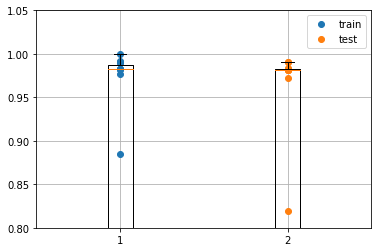

In [40]:
import matplotlib.pyplot as plt

## Qué valor de accuracy reportarías?
## Qué nos dice la varianza en cada caso?

plt.plot([1]*len(TRAIN_ACC),TRAIN_ACC,'o',label='train')
plt.plot([2]*len(TEST_ACC),TEST_ACC,'o',label='test')
plt.ylim(0.8,1.05)
plt.boxplot([TRAIN_ACC,TEST_ACC]);
plt.grid()
plt.legend();

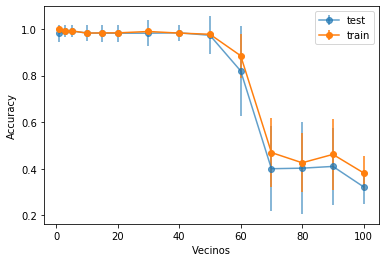

In [39]:
import numpy as np
### En la Celda que sigue, vamos a realizar la curva de complejidad. Esta vez vamos a utilizar validación cruzada. 
### Vamos a reportar el  valor medio del accuracy y su varianza. 
### No tenés que hacer nada más que ejecutar la celda e intentar entender qué significa. 

vecinos = [1,3,5,10,15,20,30,40,50,60,70,80,90,100]

X=pd.DataFrame(datos_dev)
y=pd.DataFrame(objetivo_dev)
X=X.reset_index()
y=y.reset_index()


TEST_ACC,TRAIN_ACC=[],[]
TEST_ACC_var,TRAIN_ACC_var=[],[]

for n in vecinos:
    aux_TEST_ACC,aux_TRAIN_ACC=[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        scaler = StandardScaler()
        scaler.fit(X_train);
        X_train_scal = scaler.transform(X_train)  
        X_test_scal = scaler.transform(X_test)  
        
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(X_train_scal,y_train.Species)
        y_train_pred = clf.predict(X_train_scal)
        train_acc = accuracy_score(y_train.Species, y_train_pred)
        
        y_test_pred = clf.predict(X_test_scal)
        test_acc = accuracy_score(y_test.Species, y_test_pred)

        aux_TEST_ACC.append(test_acc)
        aux_TRAIN_ACC.append(train_acc)
    
    TEST_ACC.append(np.mean(aux_TEST_ACC))
    TRAIN_ACC.append(np.mean(aux_TRAIN_ACC))
    TEST_ACC_var.append(np.std(aux_TEST_ACC))
    TRAIN_ACC_var.append(np.std(aux_TRAIN_ACC))

plt.errorbar(x=vecinos,y=TEST_ACC,yerr=TEST_ACC_var,fmt='o-',label='test',alpha=0.7)

plt.errorbar(x=vecinos,y=TRAIN_ACC,yerr=TRAIN_ACC_var,fmt='o-',label='train',alpha=1)
plt.xlabel('Vecinos')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

## B. Preprocessing. 
Como vimos las veces que utilizamos este dataset, las distintas variables no están normalizadas. Para que KNN funcione bien, es conveniente que lo estén (¿Por qué?). Entonces, vamos a utilizar el StandardScaler para que estas variables sean comparables. 

0. Chequeá cuál es el mean y el std de X_dev y X_held. 
1. Importá el StandardScaler. 
2. Cargar el StandardScaler.
3. Fittearlo con los datos de entrenamiento X_dev (¿Por qué no con y_dev?¿Por qué no con X_held? Si no sabés estas preguntas, seguí adelante y replanteatelas al final del ejercicio.)
4. Transformá las variables X_dev e X_held con el StandatdScaler que entrenaste (¿Por qué no y_train e y_test?Si no sabés estas preguntas, seguí adelante y replanteatelas al final del ejercicio.)
5. Chequeá cuál es el mean y el std de las X_dev y X_held transformadas. 


## C. KNN 
1. Importá el modelo de KNN de sklearn usando la siguiente linea: *from sklearn.neighbors import KNeighborsClassifier* 
2. Cuando cargamos el algoritmo, tenemos que indicarle los hiperparámetros que queremos utilizar. La distancia, por default, es la euclideana. Cargá el modelo utilizando 5 vecinos. 


3. Fiteá el modelo utilizando los datos de entrenamiento escaleados. 
4. Calculá el Accuracy DE DEV [importar funciones necesarias]
5. Calculá el Accuracy DE HELD-OUT.
6. ¿Conclusiones?

3.Para poder determinar el hiperparámetro K, es útil trazar la curva de complejidad. Corré las lineas a continuación e interpretá la curva. 

In [46]:
import matplotlib.pyplot as plt
####
#### PONERLE ESTOS NOMBRE A LAS VARIABLES
clf = modelo fiteado
X_dev_scal, X_held_scal = datos escaleados


####
ACC_dev = []
ACC_held = []
vecinos = [1,3,5,10,15,20,30,40,50,60,70,80,90,100]
for n in vecinos:
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_dev_scal,y_dev)
    y_dev_pred = clf.predict(X_dev_scal)
    dev_acc = accuracy_score(y_dev, y_dev_pred)
    ACC_dev.append(dev_acc)
    y_held_pred = clf.predict(X_held_scal)
    held_acc = accuracy_score(y_held, y_held_pred)
    ACC_held.append(held_acc)

SyntaxError: invalid syntax (<ipython-input-46-07cf9d6cc363>, line 4)

ValueError: x and y must have same first dimension, but have shapes (14,) and (0,)

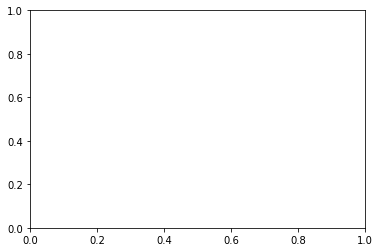

In [42]:
plt.plot(vecinos,ACC_dev,'o-',label='dev' )
plt.plot(vecinos,ACC_held,'o-',label='held')
plt.xlabel('Numero de vecinos')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

Elegí un intervalo donde te parece que es razonable buscar el K y volvé a graficar. ¿Cuál K usarías? [NOTA BIEN EN QUÉ ESCALA ESTA EL EJE "Y"]

In [ ]:
#x = ???

plt.plot(vecinos[:x],ACC_dev[:x],'o-',label='dev' )
plt.plot(vecinos[:x],ACC_held[:x],'o-',label='held')
plt.xlabel('Numero de vecinos')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

## Cross-validation

Ahora trabajemos los nuevos conceptos sobre lo aprendido. Para eso, vamos a implementar K-fold cross validation para el caso de KNN aplicado al Dataset de IRIS.

Les recomendamos seguir las instrucciones al pie de la letra antes de desesperar. 

Antes de empezar, corré hasta acá el notebook.

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
# Seteamos los folds en los que queremos entrenar y testear.
# Se te ocurre algún caso donde shuffle debe ser False? (si no se te ocurre, dejá para el final esta pregunta)
kf = KFold(n_splits=10,shuffle=True) 

Ahora vamos a ver qué hace la función `KFold`. 

In [ ]:
#Completá la funcion para que esto funcione
# PASO 1) Llamá 'X' a la variable que creés que hay que separar en distintos folds
# PASO 2) Ejecutá  esta celda. Investigá qué pasa. 
X =
y = 

for train_index, test_index in kf.split(X):
    print(" \n \n \n \n TRAIN:", train_index, " \n \n TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

Ahora que sabemos como funciona el k-fold podemos utilizarlo para evaluar la performance del modelo

In [ ]:
# Completá con las siguientes instrucciones:

# 1- Separar en conjunto train y test, usando como ejemplo la celda de arriba
# 2- Entrenar el StdScaler con los datos de entrenamiento
# 3- Re-escalar tus datos (y no etiquetas) de entrenamiento y test 
# 4- Llamar al algoritmo de KNN de sklearn. Elegir el número de vecinos que creas conveniente, según analizaste clases anteriores
# 5- Fiteá el modelo con los datos de entrenamiento. 
# 6- Realizá predicciones para los conjuntos de entrenamiento y test (ojo la escala!)
# 5- Calculá el accuracy_score del conjunto de entrenamiento y guardala en la variable 'train_acc'
# 6- Calculá el accuracy_score del conjunto de test y guardala en la variable 'test_acc'



#### Boxplot del Accuracy de los conjuntos de entrenamiento y validación. 

Qué valor de accuracy reportarías?
Qué nos dice la varianza en cada caso?

In [ ]:
## Boxplot del Accuracy de los conjuntos de entrenamiento y validación. 

## Qué valor de accuracy reportarías?
## Qué nos dice la varianza en cada caso?

plt.plot([1]*len(TRAIN_ACC),TRAIN_ACC,'o',label='train')
plt.plot([2]*len(TEST_ACC),TEST_ACC,'o',label='test')
plt.ylim(0.7,1.1)
plt.boxplot([TRAIN_ACC,TEST_ACC]);
plt.grid()
plt.legend()

#### En la Celda que sigue, vamos a realizar la curva de complejidad. Esta vez vamos a utilizar validación cruzada. 
Vamos a reportar el  valor medio del accuracy y su varianza. 

No tenés que hacer nada más que ejecutar la celda e intentar entender qué significa. 


In [ ]:
### En la Celda que sigue, vamos a realizar la curva de complejidad. Esta vez vamos a utilizar validación cruzada. 
### Vamos a reportar el  valor medio del accuracy y su varianza. 
### No tenés que hacer nada más que ejecutar la celda e intentar entender qué significa. 

vecinos = [1,3,5,10,15,20,30,40,50,60,70,80,90]

X = pd.DataFrame(X_dev)
y = pd.DataFrame(y_dev)

X=X.reset_index()
y=y.reset_index()


TEST_ACC,TRAIN_ACC=[],[]
TEST_ACC_var,TRAIN_ACC_var=[],[]

for n in vecinos:
    aux_TEST_ACC,aux_TRAIN_ACC=[],[]
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        scaler = StandardScaler()
        scaler.fit(X_train);
        X_train_scal = scaler.transform(X_train)  
        X_test_scal = scaler.transform(X_test)  
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(X_train_scal,y_train.species)
        y_train_pred = clf.predict(X_train_scal)
        train_acc = accuracy_score(y_train.species, y_train_pred)
        y_test_pred = clf.predict(X_test_scal)
        test_acc = accuracy_score(y_test.species, y_test_pred)
        aux_TEST_ACC.append(test_acc)
        aux_TRAIN_ACC.append(train_acc)
    
    TEST_ACC.append(np.mean(aux_TEST_ACC))
    TRAIN_ACC.append(np.mean(aux_TRAIN_ACC))
    TEST_ACC_var.append(np.std(aux_TEST_ACC))
    TRAIN_ACC_var.append(np.std(aux_TRAIN_ACC))

plt.errorbar(x=vecinos,y=TEST_ACC,yerr=TEST_ACC_var,fmt='o-',label='test',alpha=0.7)

plt.errorbar(x=vecinos,y=TRAIN_ACC,yerr=TRAIN_ACC_var,fmt='o-',label='train',alpha=1)
plt.legend()
plt.show()

DESAFÍO 1: ¿Qué paso de la cross-validación creen que no está implementado en el orden adecuado? ¿Cómo lo resolverías?

DESAFÍO 2: Trazar la curva de complejidad usando cross-validation para árboles de decisión.


### Ejercicio: 

Investigar qué características tienen
* Leave-one-out cross validation 
* Suffle-split cross validation